In [ ]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import imageio

In [ ]:
!unzip "/content/data.zip"

In [ ]:
def build_DataFrame(path):
    with open(path) as f:
        lines = f.readlines()
    mice_dict = {}
    table = []
    times = []
    for l in lines[3:]:
        values = l.strip().split(',')
        time = eval(values.pop(0))
        times.append(time)
        values = [eval(v) if v!='' else -1 for v in values]
        table.append(values)
    table = np.array(table)
    for i, (mouse, body) in enumerate(zip(lines[0].strip().split(',')[1:],
                                          lines[1].strip().split(',')[1:])):
        if i%3==0:
          val = 'likelyhood'  
        elif i%3==1:
          val = 'x' 
        else:
          val = 'y'
            
        mice_dict[mouse, body, val] = table[:, i]
    return np.array(times), pd.DataFrame(mice_dict)

In [ ]:
import itertools
parts = ['leftEar', 'bodycentre', 'lefthindlimb', 'tailbase','rightEar', 'nose',  'righthindlimb', 'tailtip']
days = ["Day1", "Day2", "Day3", "Day4", "Day5"]
trials = ["Trial1", "Trial2", "Trial3", "Trial4", "Trial5", "Trial6", "Trial7", "Trial8", "Trial9", "Trial10"]
paired = list(itertools.product(days, trials))
print(paired)

[('Day1', 'Trial1'), ('Day1', 'Trial2'), ('Day1', 'Trial3'), ('Day1', 'Trial4'), ('Day1', 'Trial5'), ('Day1', 'Trial6'), ('Day1', 'Trial7'), ('Day1', 'Trial8'), ('Day1', 'Trial9'), ('Day1', 'Trial10'), ('Day2', 'Trial1'), ('Day2', 'Trial2'), ('Day2', 'Trial3'), ('Day2', 'Trial4'), ('Day2', 'Trial5'), ('Day2', 'Trial6'), ('Day2', 'Trial7'), ('Day2', 'Trial8'), ('Day2', 'Trial9'), ('Day2', 'Trial10'), ('Day3', 'Trial1'), ('Day3', 'Trial2'), ('Day3', 'Trial3'), ('Day3', 'Trial4'), ('Day3', 'Trial5'), ('Day3', 'Trial6'), ('Day3', 'Trial7'), ('Day3', 'Trial8'), ('Day3', 'Trial9'), ('Day3', 'Trial10'), ('Day4', 'Trial1'), ('Day4', 'Trial2'), ('Day4', 'Trial3'), ('Day4', 'Trial4'), ('Day4', 'Trial5'), ('Day4', 'Trial6'), ('Day4', 'Trial7'), ('Day4', 'Trial8'), ('Day4', 'Trial9'), ('Day4', 'Trial10'), ('Day5', 'Trial1'), ('Day5', 'Trial2'), ('Day5', 'Trial3'), ('Day5', 'Trial4'), ('Day5', 'Trial5'), ('Day5', 'Trial6'), ('Day5', 'Trial7'), ('Day5', 'Trial8'), ('Day5', 'Trial9'), ('Day5', 'Trial

In [ ]:
import os
from pathlib import Path

mouse1 = []
mouse2 = []
mouse3 = []
mouse4 = []

rootdir = os.getcwd()
path = "/content/data/"
trials_times = []

for i in range(1, 6): # 5
  for j in range(1, 11): # 10
    path = Path("/content/data/" + "G2Day" + str(i) + "Trial" + str(j) + ".csv")
    if(path.is_file()):
      #print("/content/data/" + "G1Day" + str(i) + "Trial" + str(j) + ".csv")
      tmp_tuple = build_DataFrame("/content/data/" + "G2Day" + str(i) + "Trial" + str(j) + ".csv")
      tmp_df = tmp_tuple[1]
      trials_times.append(tmp_tuple[0])
    else:
      print(path.name + " is missing !")
      tmp_df = tmp_tuple[1].iloc[0:0]
      trials_times.append(np.array([]))

    mouse1.append(tmp_df['mus1'])
    mouse2.append(tmp_df['mus2'])
    mouse3.append(tmp_df['mus3'])
    mouse4.append(tmp_df['mus4'])

G2Day2Trial4.csv is missing !


In [ ]:
mus1_df = pd.concat(mouse1, keys = paired, axis=1)
mus2_df = pd.concat(mouse2, keys = paired, axis=1)
mus3_df = pd.concat(mouse3, keys = paired, axis=1)
mus4_df = pd.concat(mouse4, keys = paired, axis=1)

In [ ]:
for dataframe in [mus1_df, mus2_df, mus3_df, mus4_df]:
    dataframe.replace({-1.0: np.nan}, regex=True, inplace=True)
    dataframe.replace({-1: np.nan}, regex=True, inplace=True)
    dataframe.replace({0: np.nan}, regex=True, inplace=True)

In [ ]:
for day in days:
      for trial in trials:
        for bp in parts:
          x = dataframe[day][trial][bp]['x']
          outlier_x = np.abs((x - np.nanmean(x)) / np.nanstd(x)) > 2
          dataframe.loc[:, (day, trial, bp, 'x')] = x.where(~outlier_x, np.nan)

          y = dataframe[day][trial][bp]['y']
          outlier_y = np.abs((y - np.nanmean(y)) / np.nanstd(y)) > 2
          dataframe.loc[:, (day, trial, bp, 'y')] = y.where(~outlier_y, np.nan)

In [ ]:
tmp = dataframe[day][trial][bp]
mask = tmp['likelyhood']>.5
tmp[mask]
# np.array(trials_times)[mask]
np.array(trials_times[0 * 10 + 5])

array([   0,    1,    2, ..., 1471, 1472, 1473])

# Plots : 

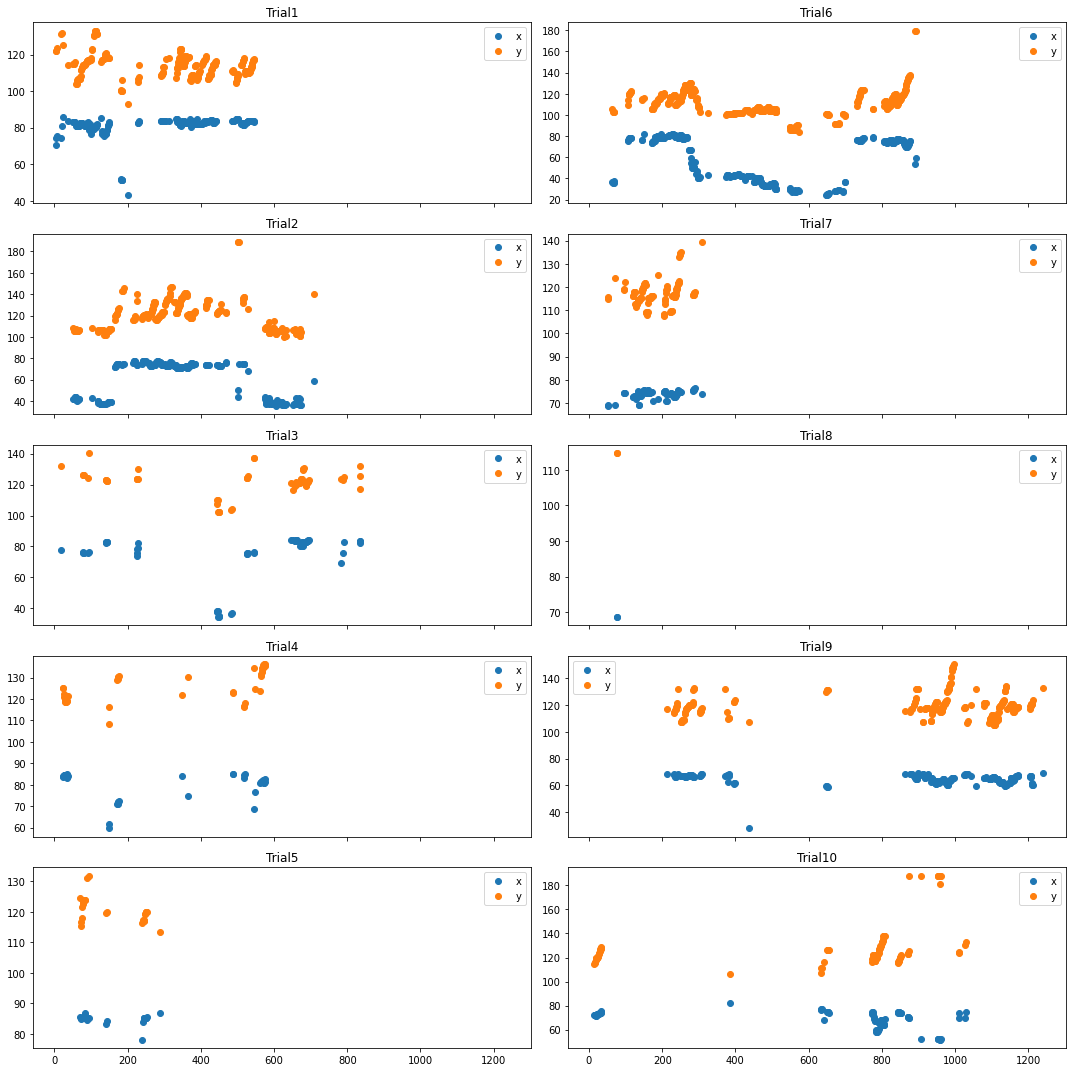

In [ ]:
def plot_same_day(df, day_id, times, bp):
  fig, ax = plt.subplots(5, 2, figsize=(15,15), sharex=True)

  day_id = day_id - 1
  for i in range(10):
    x = df[days[day_id]][trials[i]][bp]['x']
    y = df[days[day_id]][trials[i]][bp]['y']
    # .rolling(90).mean()
    l = df[days[day_id]][trials[i]][bp]['likelyhood']
    mask = .8<l

    j = day_id * 10 + i

    ax[i%5, i // 5].plot(np.arange(x.shape[0])[mask], x[mask], 'o', label='x')
    ax[i%5, i // 5].plot(np.arange(y.shape[0])[mask], y[mask], 'o', label='y')
    ax[i%5, i // 5].set_title(trials[i])
    ax[i%5, i // 5].legend()
    fig.tight_layout()
plot_same_day(mus1_df, 1, trials_times, "righthindlimb")

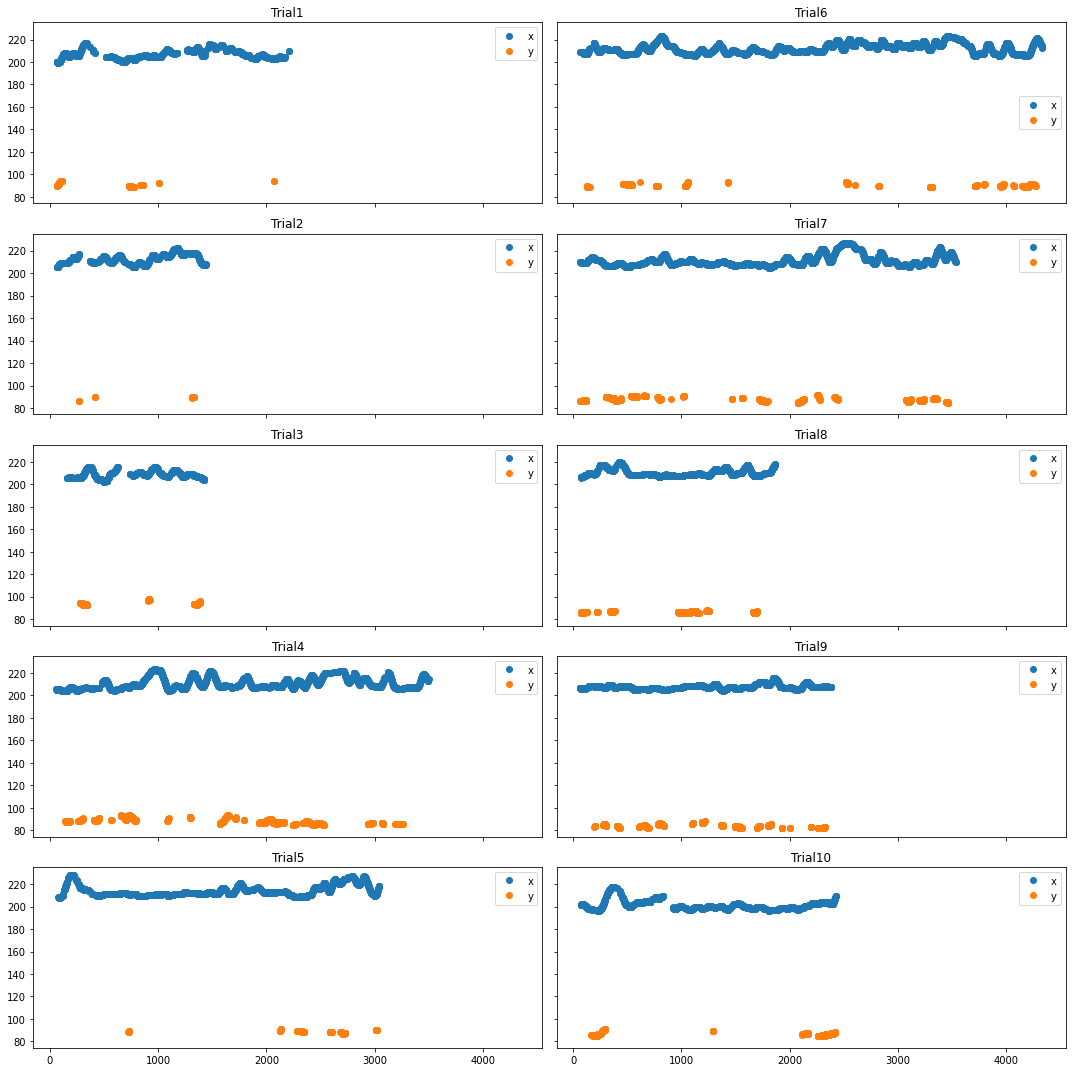

In [ ]:
def plot_max_same_day(df, day_id, times):
  # sharex=True
  fig, ax = plt.subplots(5, 2, figsize=(15,15), sharex=True, sharey=True)
  parts = ['leftEar', 'bodycentre', 'lefthindlimb', 'tailbase','rightEar', 'nose',  'righthindlimb', 'tailtip']
  days = ["Day1", "Day2", "Day3", "Day4", "Day5"]
  trials = ["Trial1", "Trial2", "Trial3", "Trial4", "Trial5", "Trial6", "Trial7", "Trial8", "Trial9", "Trial10"]

  day_id = day_id - 1
  for i in range(10):

    l1 = df[days[day_id]][trials[i]]['lefthindlimb']['likelyhood']
    l2 = df[days[day_id]][trials[i]]['righthindlimb']['likelyhood']

    mask1 = .5<l1
    mask2 = .5<l2

    if(mask1.values.sum() > mask2.values.sum()):
      bp = 'lefthindlimb'
    else:
      bp = 'righthindlimb'

    x = df[days[day_id]][trials[i]][bp]['x'].rolling(60).mean()
    y = df[days[day_id]][trials[i]][bp]['y'].rolling(60).mean()
    l = df[days[day_id]][trials[i]][bp]['likelyhood']
    mask = .5<l
    j = day_id * 10 + i

    ax[i%5, i // 5].plot(np.arange(x.shape[0])[mask], x[mask], 'o', label='x')
    ax[i%5, i // 5].plot(np.arange(y.shape[0])[mask], y[mask], 'o', label='y')
    ax[i%5, i // 5].set_title(trials[i])
    ax[i%5, i // 5].legend()
    fig.tight_layout()
plot_max_same_day(mus4_df, 4, trials_times)

In [ ]:
def plot_distances(df, day_id, times, bp1, bp2):
  fig, ax = plt.subplots(5, 2, figsize=(15,15), sharex=True)
  parts = ['leftEar', 'bodycentre', 'lefthindlimb', 'tailbase','rightEar', 'nose',  'righthindlimb', 'tailtip']
  days = ["Day1", "Day2", "Day3", "Day4", "Day5"]
  trials = ["Trial1", "Trial2", "Trial3", "Trial4", "Trial5", "Trial6", "Trial7", "Trial8", "Trial9", "Trial10"]

  day_id = day_id - 1

  for i in range(10):

    tmp1 = np.square(df[days[day_id]][trials[i]][bp1]['x'] - df[days[day_id]][trials[i]][bp2]['x']) 
    tmp2 = np.square(df[days[day_id]][trials[i]][bp1]['y'] - df[days[day_id]][trials[i]][bp2]['y']) 

    x = np.sqrt(tmp1 - tmp2)

    j = day_id * 10 + i

    ax[i%5, i // 5].scatter(np.arange(x.shape[0]), x, 'o', label='x')
    ax[i%5, i // 5].set_title(trials[i])
    ax[i%5, i // 5].legend()
    fig.tight_layout()
plot_distances(mus2_df, 2, trials_times, "bodycentre", 'lefthindlimb')

In [ ]:
from re import X
def plot_axe_direction(df, day_id, times, bp1, bp2):
  # sharex=True
  fig, ax = plt.subplots(5, 2, figsize=(15,15), sharex=True, sharey=True)
  #fig, ax = plt.subplots(5, 2, figsize=(15,15))
  parts = ['leftEar', 'bodycentre', 'lefthindlimb', 'tailbase','rightEar', 'nose',  'righthindlimb', 'tailtip']
  days = ["Day1", "Day2", "Day3", "Day4", "Day5"]
  trials = ["Trial1", "Trial2", "Trial3", "Trial4", "Trial5", "Trial6", "Trial7", "Trial8", "Trial9", "Trial10"]

  day_id = day_id - 1

  for i in range(10):

    l1 = df[days[day_id]][trials[i]]['lefthindlimb']['likelyhood']
    l2 = df[days[day_id]][trials[i]]['righthindlimb']['likelyhood']

    mask1 = .5<l1 
    mask2 = .5<l2

    mask = mask1 & mask2

    x = np.abs(df[days[day_id]][trials[i]][bp1]['x'] - df[days[day_id]][trials[i]][bp2]['x'])
    y = np.abs(df[days[day_id]][trials[i]][bp1]['y'] - df[days[day_id]][trials[i]][bp2]['y'])

    j = day_id * 10 + i

    ax[i%5, i // 5].plot(times[j][mask[:times[j].shape[0]]], x[mask].rolling(90).mean(), 'o', label='x')
    ax[i%5, i // 5].plot(times[j][mask[:times[j].shape[0]]], y[mask].rolling(90).mean(), 'o', label='y')
    ax[i%5, i // 5].set_title(trials[i])
    ax[i%5, i // 5].legend()
    fig.tight_layout()

plot_axe_direction(mus2_df, 4, trials_times, 'lefthindlimb', 'bodycentre')

# Feature engeneering :

In [ ]:
mus1_df = pd.concat(mouse1, keys = paired, axis=1)
mus2_df = pd.concat(mouse2, keys = paired, axis=1)
mus3_df = pd.concat(mouse3, keys = paired, axis=1)
mus4_df = pd.concat(mouse4, keys = paired, axis=1)

In [ ]:
parts = ['leftEar', 'bodycentre', 'lefthindlimb', 'tailbase','rightEar', 'nose',  'righthindlimb', 'tailtip']
days = ["Day1", "Day2", "Day3", "Day4", "Day5"]
trials = ["Trial1", "Trial2", "Trial3", "Trial4", "Trial5", "Trial6", "Trial7", "Trial8", "Trial9", "Trial10"]
mice = ['mus1', 'mus2', 'mus3', 'mus4', 'mus5']

# Find and remove Outsiders

In [ ]:
def find_sep(vid,frame=1,verbose=False):
    """ function used to find the separator between mices
    
    Args:
        vid (imageio reader): video of mices
        frame (int): frame number used to find the separator

    Returns:
        list: list of separator
    """
    image = vid.get_data(frame)
    line = []
    ylen = len(image) # size of the image
    
    for i in image[0]:
        line.append(sum(i))
    
    # loop used to do the sum of the first quarter of the image
    for i in range(int(ylen/4)): 
        tmp_line = []
        for j in image[i]: 
            tmp_line.append(sum(j))
        line = [sum(value) for value in zip(tmp_line, line)] # increment the value in line 
    if verbose:
        plt.axhline(sum(line)/len(line))
        plt.plot(line)
    
    limit = sum(line)/len(line) # value used as a threshold
    
    not_in_separator = True
    border = []  # list which contain the two border of each separator
    for i in range(len(line)):
        if line[i] < limit and not_in_separator: # if the value is less than the threshold and not. in a sep, it's a left border
            not_in_separator = False
            border.append(i)
        if not not_in_separator and line[i] > limit: # if the value is more than the threshold on in a sep, it's a right border
            not_in_separator = True
            border.append(i)
    # just if the last value is under the threshold, add it as a border (the right border is not in the picture)
    if line[-1] < limit: 
        border.append(i)
        
    limit_border = []
    print("there is {} sep".format(len(border)/2))
    for i in range(0,len(border),2):
        if i< len(border)/2:
            limit_border.append(border[i])
        else:
            limit_border.append(border[i+1])
    print(limit_border)
    print("")
    if verbose:
        for sep in limit_border:
            plt.axvline(sep,color="red")
    return limit_border



def plot_line_on_img(sep,vid,frame=10):
    """function used to plot the separators on the image
    
    Args:
        sep (list): list of x positions of the separators
        vid (imageio reader): video used 
        frame (int): frame number for the display

    """
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.imshow(vid.get_data(frame), )
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    for x in sep:
        plt.axvline(x)
        plt.axvline(x+5,color="yellow")
        plt.axvline(x-5,color="yellow")

    fig.tight_layout()



def remove_outsider(x_array,sep,mouse_nb):
    """ function find the outsiders in the values
    
    Args:
        x_array (pd.Series): list of x values 
        sep (list): list of separator 
        mouse_nb (int): identifier of the mouse

    Returns:
        pd.Series: data with outsiders replaced by Nan
    """
    if len(sep) == 6 and mouse_nb > 2:
        mouse_nb += 1
        
    left_border = sep[mouse_nb-1]
    right_border = sep[mouse_nb]
    x_array = x_array.where(x_array < right_border+5,np.nan)
    x_array = x_array.where(x_array > left_border-5,np.nan)
    return x_array
   


def find_outsiders(vid,df,mouse_number,frame_nb=500,verbose=False):
    """ function find the outsiders in the values
    
    Args:
        vid (imageio reader): video of mices
        df (pd.DataFrame): dataframe of one mouses corresponding to one video
        frame (int): frame number used to find the separator

    Returns:
        pd.DataFrame: dataframe with the outsiders replaced by Nan
    """
    sep = find_sep(vid,frame_nb,verbose) # find the separator in the video
    if verbose:
        plot_line_on_img(sep,vid,frame_nb) # just to plot the line
    total = 0
    dict_bp = {}
    for bp in df.columns.levels[0]:
        bc = df[bp]['x'].isna().sum()

        dict_bp[bp] = remove_outsider(df.loc[:][bp,"x"],sep,mouse_number) # remove the outsiders
        ac = dict_bp[bp].isna().sum()
        
        if verbose:
            print("nb of outsider in {} = {}".format(bp,ac-bc))
        total += ac-bc
    print("Nb outsider : {}\n\n".format(total))
    return dict_bp

def curation(df,group="G1",mouse_nb=1):
    df.replace({-1: np.nan}, regex=True, inplace=True)
    df.replace({0: np.nan}, regex=True, inplace=True)

    path_to_dir="../../Downloads/"
    for day in df.columns.levels[0]:
        print(day)
        for trial in df.columns.levels[1]:
            print(trial)
            if os.path.isdir(path_to_dir+group+day+"/"+trial):
                for i in os.listdir(path_to_dir+group+day+"/"+trial):
                    if ".avi" in i:
                        fpath = path_to_dir+group+day+"/"+trial+"/"+i
                        vid = imageio.get_reader(fpath,  'ffmpeg')
                        dict_x = find_outsiders(vid,df.loc[:][day,trial],mouse_nb)
                        for key in dict_x:
                            for i in range(len(df.loc[:][day,trial,key])):
                                df.loc[i][day,trial,key] = dict_x[key].loc[i]
    return df.copy(deep=True)





    
                



In [ ]:

out1 = curation(mus1_df,"G1",1)
out2 = curation(mus2_df,"G1",2)
out3 = curation(mus3_df,"G1",3)
out4 = curation(mus4_df,"G1",4)
out5 = curation(mus5_df,"G2",1)
out6 = curation(mus6_df,"G2",2)
out7 = curation(mus7_df,"G2",3)
out8 = curation(mus8_df,"G2",4)